### Let's setup the environment by importing required libraries.

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Suburbs_of_Chennai').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
csv_file = open('chennai.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [29]:

csv_file.close()

In [6]:
chennai_raw = pd.read_csv('chennai.csv')

In [7]:
chennai_raw.shape

(60, 1)

In [8]:
chennai_raw

,Neighbourhood
0,Chitlapakkam
1,Chromepet
2,Cowl Bazaar
3,Egattur (Kanchipuram District)
4,Guduvancheri
5,Iyyapanthangal
6,"K. K. Nagar, Chennai"
7,"Kallikuppam, Ambattur"
8,Kamarajapuram
9,Keelkattalai


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = chennai_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Chennai, India'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
man_data = chennai_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [11]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Chitlapakkam,12.93277,80.14387
1,Chromepet,12.95234,80.14411
2,Cowl Bazaar,12.98861,80.15100
3,Egattur (Kanchipuram District),12.82725,80.22866
4,Guduvancheri,12.83790,80.05327


In [12]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


### Now we will get Latitude and Longitude of Chennai.

In [13]:
from geopy.geocoders import Nominatim

address = 'Chennai, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Chennai are 13.0801721, 80.2838331.


### Let's plot map of Chennai using latitude and longitude values.

In [14]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

### In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the neighbourhoods on Chennai.

In [15]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

### Now we will create a dataframe for performing clustering.

In [17]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Chitlapakkam,12.93277,80.14387,Varadharaja Theatre,Movie Theater,12.937733,80.139088
1,Chitlapakkam,12.93277,80.14387,chitlapakam lake,Lake,12.933316,80.137993
2,Chitlapakkam,12.93277,80.14387,Nilgiris super market,Grocery Store,12.924201,80.141749
3,Chitlapakkam,12.93277,80.14387,Adyar Bakery,Bakery,12.923959,80.142109
4,Chromepet,12.95234,80.14411,Ibaco,Ice Cream Shop,12.953714,80.141798


### Now we will perform one-hot encoding to analyze neighbourhoods of Chennai.

In [18]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,ATM,Airport Terminal,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Beach,Big Box Store,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Coworking Space,Cupcake Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,Hospital,Hotel,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Kerala Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Market,Men's Store,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,North Indian Restaurant,Office,Optical Shop,Park,Pharmacy,Pizza Place,Platform,Playground,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Supermarket,Tea Room,Thai Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Chitlapakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chitlapakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chitlapakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chitlapakkam,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chromepet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### In the following step we will agregate the venues by neighbourhoods and later we will create a function to return most common venues.

In [19]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,ATM,Airport Terminal,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Beach,Big Box Store,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Coworking Space,Cupcake Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,Hospital,Hotel,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Kerala Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Market,Men's Store,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,North Indian Restaurant,Office,Optical Shop,Park,Pharmacy,Pizza Place,Platform,Playground,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Supermarket,Tea Room,Thai Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Chitlapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0000,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.25,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.00,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0
1,Chromepet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.058824,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.00,0.0,0.0000,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.058824,0.352941,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.058824,0.00,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0000,0.0,0.0000,0.058824,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.00,0.0,0.0,0.0,0.0
2,Cowl Bazaar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0000,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.25,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0
3,Egattur (Kanchipuram District),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0000,0.0,0.0000,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.25,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,0.0
4,Guduvancheri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.00,0.0,0.0625,0.0,0.0625,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.000000,0.125000,0.0,0.0,0.0,0.0625,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.0625,0.0,0.0625,0.000000,0.0,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.00,0.0,0.0,0.0,0.0


In [20]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

### Now we will create a new dataframe to get the top 10 venues.

In [21]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chitlapakkam,Grocery Store,Bakery,Movie Theater,Lake,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
1,Chromepet,Indian Restaurant,Bakery,Ice Cream Shop,Shopping Mall,Clothing Store,Big Box Store,Pizza Place,Bus Station,Fast Food Restaurant,Men's Store
2,Cowl Bazaar,Indian Restaurant,Moving Target,Flower Shop,Men's Store,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
3,Egattur (Kanchipuram District),Hotel,Vegetarian / Vegan Restaurant,Multiplex,Fried Chicken Joint,Food & Drink Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
4,Guduvancheri,Indian Restaurant,Hotel,South Indian Restaurant,Food Stand,Food & Drink Shop,Kerala Restaurant,Fast Food Restaurant,North Indian Restaurant,Pizza Place,Restaurant


### Now we will apply K-means clustering on the dataframe.

In [22]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [24]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

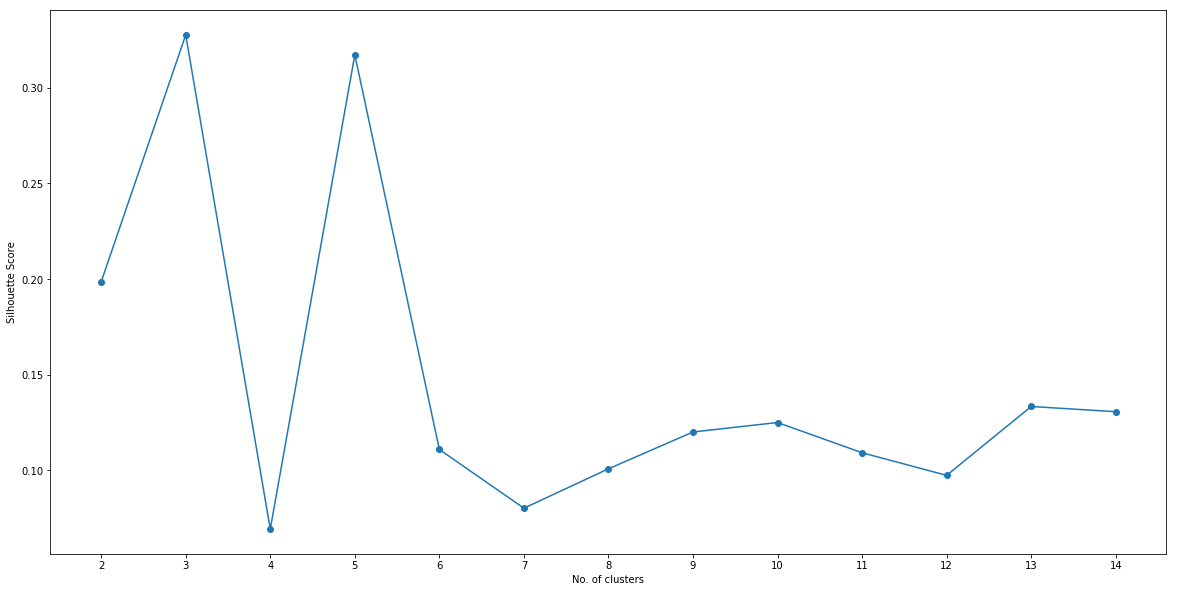

In [25]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

### From the graph the optimal number is found to be 8 using the Elbow Method.

In [30]:
opt_value = 4

### Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering.

In [31]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [32]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Now we will crate a final version of dataframe containing all the necessary data.

In [33]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chitlapakkam,12.93277,80.14387,1,Grocery Store,Bakery,Movie Theater,Lake,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
1,Chromepet,12.95234,80.14411,2,Indian Restaurant,Bakery,Ice Cream Shop,Shopping Mall,Clothing Store,Big Box Store,Pizza Place,Bus Station,Fast Food Restaurant,Men's Store
2,Cowl Bazaar,12.98861,80.15100,2,Indian Restaurant,Moving Target,Flower Shop,Men's Store,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
3,Egattur (Kanchipuram District),12.82725,80.22866,1,Hotel,Vegetarian / Vegan Restaurant,Multiplex,Fried Chicken Joint,Food & Drink Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
4,Guduvancheri,12.83790,80.05327,1,Indian Restaurant,Hotel,South Indian Restaurant,Food Stand,Food & Drink Shop,Kerala Restaurant,Fast Food Restaurant,North Indian Restaurant,Pizza Place,Restaurant


### In the next step we will visualize the clusters using Folium.

In [34]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

### Now lets have a look at all clusters.

In [35]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Thalambur,Badminton Court,Women's Store,Food Stand,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop


In [36]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chitlapakkam,Grocery Store,Bakery,Movie Theater,Lake,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
3,Egattur (Kanchipuram District),Hotel,Vegetarian / Vegan Restaurant,Multiplex,Fried Chicken Joint,Food & Drink Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
4,Guduvancheri,Indian Restaurant,Hotel,South Indian Restaurant,Food Stand,Food & Drink Shop,Kerala Restaurant,Fast Food Restaurant,North Indian Restaurant,Pizza Place,Restaurant
5,Iyyapanthangal,Bakery,Hospital,Vegetarian / Vegan Restaurant,Pizza Place,Fast Food Restaurant,Café,Sandwich Place,Food & Drink Shop,Deli / Bodega,Department Store
6,"K. K. Nagar, Chennai",Multiplex,Train Station,Bakery,Food Truck,Light Rail Station,Smoke Shop,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store
8,Kamarajapuram,ATM,Concert Hall,Platform,Fast Food Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Flea Market
9,Keelkattalai,Pizza Place,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Women's Store,Food & Drink Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop
10,Kelambakkam,Pizza Place,Coffee Shop,Bus Station,Sporting Goods Shop,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
12,Kodambakkam,Juice Bar,Train Station,Bakery,Tea Room,Lounge,Restaurant,Lighthouse,Ice Cream Shop,Gym / Fitness Center,Grocery Store
13,Kodungaiyur,ATM,Coffee Shop,Bakery,Food Court,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market


In [37]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chromepet,Indian Restaurant,Bakery,Ice Cream Shop,Shopping Mall,Clothing Store,Big Box Store,Pizza Place,Bus Station,Fast Food Restaurant,Men's Store
2,Cowl Bazaar,Indian Restaurant,Moving Target,Flower Shop,Men's Store,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
11,Kilpauk,Indian Restaurant,Café,South Indian Restaurant,Fast Food Restaurant,Hotel,Italian Restaurant,Food,Daycare,Juice Bar,Pizza Place
17,Madambakkam,Playground,Cupcake Shop,Indian Restaurant,Fast Food Restaurant,Food & Drink Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
19,Madipakkam,Convenience Store,Department Store,Indian Restaurant,Grocery Store,Women's Store,Food Court,Deli / Bodega,Dessert Shop,Electronics Store,Fast Food Restaurant
21,Manapakkam,Trail,Indian Restaurant,Supermarket,Women's Store,Food Court,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store
26,Nazarethpettai,Indian Restaurant,Pharmacy,Coffee Shop,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant
31,Pallikaranai,Indian Restaurant,Bar,Women's Store,Food Stand,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market
40,"Potheri village, Kanchipuram",Indian Restaurant,Market,Hotel,Train Station,College Cafeteria,Juice Bar,Café,Sandwich Place,Burger Joint,Food
48,"Senji, Chennai",Indian Restaurant,Train Station,Platform,Restaurant,Hotel,Museum,Market,Bus Station,Sandwich Place,Bookstore


In [38]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Kallikuppam, Ambattur",ATM,Food Court,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop
14,Korattur,ATM,Food Court,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop


### After studying all four clusters, it is recommended to the client that neighbourhoods such as Chromepet, Kilpauk and Cowl Bazaar that fall in cluster 3 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on othr factors like availability and legal requirements that are out of scope of this project.